# Import packages

In [ ]:
pip install magenpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 30.3 MB/s eta 0:00:00
  Created wheel for magenpy: filename=magenpy-0.0.12-cp310-cp310-linux_x86_64.whl size=2427773 sha256=f3bcec043373014b142034618d7d324ed6acc5eb58408e0d6ac52d11ceafddaf
  Stored in directory: /root/.cache/pip/wheels/c1/6b/93/95854e8ff2d7c69be8144916309a4c1fcf21ad734765560de6
  Created whe

In [ ]:
pip install viprs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for viprs: filename=viprs-0.0.4-cp310-cp310-linux_x86_64.whl size=4641042 sha256=b6a2ee902d796864ec7306af80f853838916657716cabca5a2711c5c9a143dd6
  Stored in directory: /root/.cache/pip/wheels/95/76/c6/4444041d9788e64e77c8683422826142bfb0b93efd3a7749a0
Successfully built viprs


In [ ]:
import pandas as pd
import numpy as np
import magenpy as mgp
import zarr
import math
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import viprs as vp
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import collections
collections.Iterable = collections.abc.Iterable

# Load the data

## Train and test data

### CHR_21

In [ ]:
gdl_21_train_fold_1 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_1.sumstats.csv",
                        sumstats_format="plink")
gdl_21_train_fold_2 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_2.sumstats.csv",
                        sumstats_format="plink")
gdl_21_train_fold_3 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_3.sumstats.csv",
                        sumstats_format="plink")
gdl_21_train_fold_4 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_4.sumstats.csv",
                        sumstats_format="plink")
gdl_21_train_fold_5 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_5.sumstats.csv",
                        sumstats_format="plink")

> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 171.90it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 175.82it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 176.91it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 174.97it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 174.54it/s]


In [ ]:
gdl_21_test_fold_1 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_1.csv",
                        sumstats_format="magenpy")
gdl_21_test_fold_2 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_2.csv",
                        sumstats_format="magenpy")
gdl_21_test_fold_3 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_3.csv",
                        sumstats_format="magenpy")
gdl_21_test_fold_4 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_4.csv",
                        sumstats_format="magenpy")
gdl_21_test_fold_5 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_21",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_5.csv",
                        sumstats_format="magenpy")

> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 125.37it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 212.11it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 192.19it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 141.60it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 196.18it/s]


### CHR_22

In [ ]:
gdl_22_train_fold_1 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_1.sumstats.csv",
                        sumstats_format="plink")
gdl_22_train_fold_2 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_2.sumstats.csv",
                        sumstats_format="plink")
gdl_22_train_fold_3 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_3.sumstats.csv",
                        sumstats_format="plink")
gdl_22_train_fold_4 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_4.sumstats.csv",
                        sumstats_format="plink")
gdl_22_train_fold_5 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/training/height_fold_5.sumstats.csv",
                        sumstats_format="plink")

> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 160.35it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 172.34it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 96.02it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 155.85it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 99.72it/s] 


In [ ]:
gdl_22_test_fold_1 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_1.csv",
                        sumstats_format="magenpy")
gdl_22_test_fold_2 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_2.csv",
                        sumstats_format="magenpy")
gdl_22_test_fold_3 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_3.csv",
                        sumstats_format="magenpy")
gdl_22_test_fold_4 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_4.csv",
                        sumstats_format="magenpy")
gdl_22_test_fold_5 = mgp.GWADataLoader(ld_store_files="/content/gdrive/My Drive/COMP 565/final_project/chr_22",
                        sumstats_files="/content/gdrive/My Drive/COMP 565/final_project/sumstats/test/height_test_fold_5.csv",
                        sumstats_format="magenpy")

> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 183.43it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 187.00it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 107.63it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 174.79it/s]


> Reading LD matrix...
> Reading summary statistics file...


Harmonizing data: 100%|██████████| 22/22 [00:00<00:00, 174.71it/s]


## LD

In [ ]:
# Read the LD matrix:
ldm_21 = mgp.LDMatrix.from_path("/content/gdrive/My Drive/COMP 565/final_project/chr_21")
# print the number of SNPs:
print(ldm_21.n_snps)
# Convert to sparse matrix format:
LD_chr_21 = ldm_21.to_csr_matrix() #16320*16320

# Read the LD matrix:
ldm_22 = mgp.LDMatrix.from_path("/content/gdrive/My Drive/COMP 565/final_project/chr_22")
# print the number of SNPs:
print(ldm_22.n_snps)
# Convert to sparse matrix format:
LD_chr_22 = ldm_22.to_csr_matrix() # 16558*16558

16320
16558


In [ ]:
LD_chr_21.toarray()

array([[ 1.      ,  0.998864,  0.99998 , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.998864,  1.      ,  0.998885, ...,  0.      ,  0.      ,
         0.      ],
       [ 0.99998 ,  0.998885,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  1.      ,  0.999708,
        -0.354345],
       [ 0.      ,  0.      ,  0.      , ...,  0.999708,  1.      ,
        -0.354298],
       [ 0.      ,  0.      ,  0.      , ..., -0.354345, -0.354298,
         1.      ]])

In [ ]:
LD_chr_22.toarray()

array([[1.      , 0.998795, 0.984465, ..., 0.      , 0.      , 0.      ],
       [0.998795, 1.      , 0.985279, ..., 0.      , 0.      , 0.      ],
       [0.984465, 0.985279, 1.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 1.      , 0.946327, 0.55209 ],
       [0.      , 0.      , 0.      , ..., 0.946327, 1.      , 0.589543],
       [0.      , 0.      , 0.      , ..., 0.55209 , 0.589543, 1.      ]])

## Annotation

In [ ]:
annotation_21 = pd.read_csv("/content/gdrive/My Drive/COMP 565/final_project/annotations/baselineLD.21.annot",sep='\t')
annotation_22 = pd.read_csv("/content/gdrive/My Drive/COMP 565/final_project/annotations/baselineLD.22.annot",sep='\t')

In [ ]:
annotation_21 = annotation_21.drop(["BP", "CM", "base"], axis = 1)
annotation_21

,CHR,SNP,Coding_UCSC,Coding_UCSC.flanking.500,Conserved_LindbladToh,Conserved_LindbladToh.flanking.500,CTCF_Hoffman,CTCF_Hoffman.flanking.500,DGF_ENCODE,DGF_ENCODE.flanking.500,...,Human_Promoter_Villar.flanking.500,Human_Enhancer_Villar,Human_Enhancer_Villar.flanking.500,Ancient_Sequence_Age_Human_Promoter,Ancient_Sequence_Age_Human_Promoter.flanking.500,Ancient_Sequence_Age_Human_Enhancer,Ancient_Sequence_Age_Human_Enhancer.flanking.500,Human_Enhancer_Villar_Species_Enhancer_Count,Human_Promoter_Villar_ExAC,Human_Promoter_Villar_ExAC.flanking.500
0,21,rs146134162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,rs578050168,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,rs527616997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,rs544748596,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,rs528236937,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138707,21,rs11910421,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138708,21,rs559373972,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138709,21,rs533222456,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138710,21,rs199868906,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
annotation_22 = annotation_22.drop(["BP", "CM", "base"], axis = 1)
annotation_22

,CHR,SNP,Coding_UCSC,Coding_UCSC.flanking.500,Conserved_LindbladToh,Conserved_LindbladToh.flanking.500,CTCF_Hoffman,CTCF_Hoffman.flanking.500,DGF_ENCODE,DGF_ENCODE.flanking.500,...,Human_Promoter_Villar.flanking.500,Human_Enhancer_Villar,Human_Enhancer_Villar.flanking.500,Ancient_Sequence_Age_Human_Promoter,Ancient_Sequence_Age_Human_Promoter.flanking.500,Ancient_Sequence_Age_Human_Enhancer,Ancient_Sequence_Age_Human_Enhancer.flanking.500,Human_Enhancer_Villar_Species_Enhancer_Count,Human_Promoter_Villar_ExAC,Human_Promoter_Villar_ExAC.flanking.500
0,22,rs587616822,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,22,rs62224609,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,22,rs587646183,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,rs139918843,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,rs587743102,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141118,22,rs370652263,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141119,22,rs541098394,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
141120,22,rs202228854,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141121,22,rs568168135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1 VIPRS

## CHR_21

In [ ]:
prs_list_21 = []
# Initialize VIPRS, passing it the GWADataLoader object
v1 = vp.VIPRS(gdl_21_train_fold_1)
# Invoke the .fit() method to obtain posterior estimates
v1.fit()
test_prs_1 = v1.pseudo_validate(validation_gdl = gdl_21_test_fold_1)
prs_list_21.append(test_prs_1)

v2 = vp.VIPRS(gdl_21_train_fold_2)
v2.fit()
test_prs_2 = v2.pseudo_validate(validation_gdl = gdl_21_test_fold_2)
prs_list_21.append(test_prs_2)

v3 = vp.VIPRS(gdl_21_train_fold_3)
v3.fit()
test_prs_3 = v3.pseudo_validate(validation_gdl = gdl_21_test_fold_3)
prs_list_21.append(test_prs_3)

v4 = vp.VIPRS(gdl_21_train_fold_4)
v4.fit()
test_prs_4 = v4.pseudo_validate(validation_gdl = gdl_21_test_fold_4)
prs_list_21.append(test_prs_4)

v5 = vp.VIPRS(gdl_21_train_fold_5)
v5.fit()
test_prs_5 = v5.pseudo_validate(validation_gdl = gdl_21_test_fold_5)
prs_list_21.append(test_prs_5)

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 14%|█▍        | 142/1000 [00:18<01:50,  7.73it/s]


Converged at iteration 143 || ELBO: -343516.383723
> Final ELBO: -343516.383723
> Estimated heritability: 0.003288
> Estimated proportion of causal variants: 0.006448
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 34/1000 [00:03<01:45,  9.12it/s]


Converged at iteration 35 || ELBO: -343501.028140
> Final ELBO: -343501.028140
> Estimated heritability: 0.003715
> Estimated proportion of causal variants: 0.006604
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  4%|▍         | 41/1000 [00:03<01:33, 10.27it/s]


Converged at iteration 42 || ELBO: -343497.082210
> Final ELBO: -343497.082210
> Estimated heritability: 0.003754
> Estimated proportion of causal variants: 0.006867
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 16%|█▌        | 159/1000 [00:19<01:43,  8.14it/s]


Converged at iteration 160 || ELBO: -343503.885821
> Final ELBO: -343503.885821
> Estimated heritability: 0.003790
> Estimated proportion of causal variants: 0.008841
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  4%|▍         | 41/1000 [00:05<02:16,  7.05it/s]


Converged at iteration 42 || ELBO: -343509.781362
> Final ELBO: -343509.781362
> Estimated heritability: 0.003432
> Estimated proportion of causal variants: 0.005992


In [ ]:
prs_list_21

[0.05387647617645916,
 0.04928501256970781,
 0.045830680267027746,
 0.05030299398100647,
 0.052393253476078316]

## CHR_22

In [ ]:
prs_list_22 = []
# Initialize VIPRS, passing it the GWADataLoader object
v1 = vp.VIPRS(gdl_22_train_fold_1)
# Invoke the .fit() method to obtain posterior estimates
v1.fit()
test_prs_1 = v1.pseudo_validate(validation_gdl = gdl_22_test_fold_1)
prs_list_22.append(test_prs_1)

v2 = vp.VIPRS(gdl_22_train_fold_2)
v2.fit()
test_prs_2 = v2.pseudo_validate(validation_gdl = gdl_22_test_fold_2)
prs_list_22.append(test_prs_2)

v3 = vp.VIPRS(gdl_22_train_fold_3)
v3.fit()
test_prs_3 = v3.pseudo_validate(validation_gdl = gdl_22_test_fold_3)
prs_list_22.append(test_prs_3)

v4 = vp.VIPRS(gdl_22_train_fold_4)
v4.fit()
test_prs_4 = v4.pseudo_validate(validation_gdl = gdl_22_test_fold_4)
prs_list_22.append(test_prs_4)

v5 = vp.VIPRS(gdl_22_train_fold_5)
v5.fit()
test_prs_5 = v5.pseudo_validate(validation_gdl = gdl_22_test_fold_5)
prs_list_22.append(test_prs_5)

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 32/1000 [00:03<01:36, 10.06it/s]


Converged at iteration 33 || ELBO: -343447.668410
> Final ELBO: -343447.668410
> Estimated heritability: 0.004632
> Estimated proportion of causal variants: 0.008943
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  8%|▊         | 85/1000 [00:10<01:50,  8.27it/s]


Converged at iteration 86 || ELBO: -343454.442247
> Final ELBO: -343454.442247
> Estimated heritability: 0.004560
> Estimated proportion of causal variants: 0.010592
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  3%|▎         | 30/1000 [00:03<01:48,  8.93it/s]


Converged at iteration 31 || ELBO: -343462.782891
> Final ELBO: -343462.782891
> Estimated heritability: 0.004440
> Estimated proportion of causal variants: 0.008967
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 14%|█▍        | 144/1000 [00:18<01:52,  7.63it/s]


Converged at iteration 145 || ELBO: -343425.396321
> Final ELBO: -343425.396321
> Estimated heritability: 0.004880
> Estimated proportion of causal variants: 0.009118
> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 14%|█▍        | 144/1000 [00:16<01:38,  8.70it/s]

Converged at iteration 145 || ELBO: -343452.620152
> Final ELBO: -343452.620152
> Estimated heritability: 0.004681
> Estimated proportion of causal variants: 0.008756


In [ ]:
prs_list_22

[0.055597501566565094,
 0.05662839494151994,
 0.05675185787991545,
 0.04973819994354065,
 0.05500067191579865]

# 2 Binary VIPRS

In [ ]:
class Binary_VIPRS:
  def __init__(self, dataset, CHR, A, eta = 0.01):
      """
      :param dataset: magenpy dataset, magenpy.GWADataLoader.GWADataLoader.
      :param CHR: chromosomes number, int.
      :param A: the annotation matrix, pandas dataframe.
      :param niter: number of iterations, int.
      :param eta: the learning rate that is used to perform gradient ascent for the hyperparameter w, float.
      """
      # Define all the data needed for calculations
      self.LD = dataset.ld[CHR].to_csr_matrix().toarray() # P*P ndarray
      self.beta_marginal = dataset.to_summary_statistics_table()[["CHR", "SNP", "BETA"]] # P*3 pd.DataFrame
      self.N = dataset.sample_size # number of individuals
      self.A = A # 98 columns in total, the first two columns are CHR and SNP, the matrix is the last 96 columns
      self.P = len(dataset.snps[CHR]) # number of snps
      _, self.K = A.iloc[:, 2:98].shape # K = 96
      self.eta = eta
      self.SNP = dataset.snps[CHR] # get all the snps' names so that we could find the corresponded annotation a_j

      # Initialize the variational parameters
      self.mu_beta = np.full((self.P,), 0.0) # P*1
      self.tau_beta = np.full((self.P,), 1.0) # P*1
      self.gamma = np.full((self.P,), 0.01) # P*1

      # Initialize the value of hyperparameters
      np.random.seed(565)
      self.w = np.random.normal(0, 0.001, size = (self.K,)) # K*1
      self.tau_k = np.full((self.K,), 1.0/(0.01/self.K)) # K*1
      self.tau_e = 1

  def e_step(self):
    """
    This function performs the E-step of EM algorithm
    """
    N = self.N
    tau_e = self.tau_e
    tau_k = self.tau_k.copy()
    tau_beta = self.tau_beta.copy()
    mu_beta = self.mu_beta.copy()
    gamma = self.gamma.copy()
    beta_marginal = self.beta_marginal[["BETA"]].to_numpy().flatten().copy()
    SNP = self.SNP.copy()
    A = self.A.copy()
    LD = self.LD.copy()
    w = self.w.copy()

    sigmoid = lambda x: 1 / (1 + np.exp(-x))

    # Loop through each SNP j
    for j in range(self.P):

      # Compute sum of tau_k where a_jk = 1
      snp_name = SNP[j]
      a_j = A[A["SNP"] == snp_name].iloc[:,2:98].to_numpy().flatten()
      sum_tau_k = sum(tau_k[k] for k in range(self.K) if a_j[k] == 1)

      # Compute tau_beta_j
      tau_beta_j = N * tau_e + sum_tau_k
      tau_beta[j] = tau_beta_j

      # Compute mu_beta_j
      r_j = LD[j]
      sum_i_neq_j = sum(gamma[i]*mu_beta[i]*r_j[i] for i in range(self.P) if i != j)
      mu_beta_j = N * (tau_e / tau_beta_j) * (beta_marginal[j] - sum_i_neq_j)
      #print(mu_beta_j)
      mu_beta[j] = mu_beta_j
      #print(mu_beta[j])

      # Compute u_j and gamma_j
      aw = np.matmul(a_j, w)
      pi_j = sigmoid(aw)
      if pi_j > 0.999999: # avoid 0 division
        pi_j = 0.999999
      u_j = np.log(pi_j / (1-pi_j)) + 0.5 * np.log(sum_tau_k / tau_beta_j) + (tau_beta_j / 2) * (mu_beta_j**2)
      gamma_j = sigmoid(u_j)

      if gamma_j < 0.000001: # Restrict gamma_j between 0.01 and 0.99
        gamma_j = 0.000001
      elif gamma_j > 0.999999:
        gamma_j = 0.999999

      gamma[j] = gamma_j

    # Update to the public fields
    self.mu_beta = mu_beta # P*1
    self.tau_beta = tau_beta # P*1
    self.gamma = gamma # P*1

  def m_step(self):
    """
    This function performs the M-step of EM algorithm
    """
    tau_k = self.tau_k.copy()
    w = self.w.copy()
    annotation_name = self.A.columns.to_numpy()[2:98].copy()
    self.annotation_name = annotation_name
    A = self.A.copy()
    SNP = self.SNP.copy()
    mu_beta = self.mu_beta.copy()
    tau_beta = self.tau_beta.copy()
    gamma = self.gamma.copy()

    sigmoid = lambda x: 1 / (1 + np.exp(-x))

    # Update tau_k
    for k in range(self.K):
      annot = annotation_name[k]
      snps = A[A[annot] == 1]["SNP"].to_numpy()
      snp_ind = np.nonzero(np.in1d(SNP,snps))[0]
      term1 = np.sum(gamma[snp_ind] * (mu_beta[snp_ind] * mu_beta[snp_ind] + 1/tau_beta[snp_ind]))
      term2 = np.sum(gamma[snp_ind])
      if term2 < 1e-6: # avoid zero division
        tau_k[k] = 1e-6
      else:
        tau_k[k] = 1/(term1 / term2)

    # Update w
    A_annot = A[A["SNP"].isin(SNP)].drop(['CHR','SNP'], axis = 1).to_numpy()
    Aw = np.matmul(A_annot, w)
    pi = sigmoid(Aw)
    delta_w = np.matmul(A_annot.T, gamma-pi)
    w = w - self.eta * delta_w

    # Update to public fields
    self.tau_k = tau_k
    self.w = w

  def pseudo_validate(self, test_set, CHR):
    """
    This function is used to compute the R^2 statistics
    in order to evaluate the performance of the model.

    :param test_set: test set.
    :param CHR: chromosomes number, int.
    """
    mu_beta = self.mu_beta.copy()
    gamma = self.gamma.copy()
    SNP = self.SNP.copy()
    beta_hat = gamma * mu_beta # posterior
    self.beta_hat = beta_hat

    SNP_test = test_set.to_summary_statistics_table()[["SNP"]].to_numpy().flatten()
    snp_ind = np.nonzero(np.in1d(SNP_test,SNP))[0]
    beta_test = test_set.to_summary_statistics_table()[["BETA"]].to_numpy().flatten()
    beta_test = beta_test[snp_ind]

    LD_test = test_set.ld[CHR].to_csr_matrix().toarray().copy()
    LD_test = LD_test[snp_ind][:,snp_ind]

    return (2 * np.matmul(beta_test.T, beta_hat) - np.matmul(beta_hat.T, np.matmul(LD_test, beta_hat)))


  def fit(self, niter):
    for i in tqdm(range(niter)):
      self.e_step()
      self.m_step()

  def fit_evaluate_per_iter(self, niter, test_set, CHR):
    r2_lst = []
    for i in range(niter):
      self.e_step()
      self.m_step()
      r2 = self.pseudo_validate(test_set, CHR)
      print("iteration: " + str(i+1) + " R^2: " + str(r2))
      r2_lst.append(r2)
    return r2_lst

# 3 Fit and evaluation

## CHR_21

### fold 1

In [ ]:
gdl_21_fold_1 = Binary_VIPRS(dataset = gdl_21_train_fold_1, CHR = 21, A = annotation_21, eta = 0.05)

In [ ]:
r2_21_fold_1 = gdl_21_fold_1.fit_evaluate_per_iter(niter = 5, test_set = gdl_21_test_fold_1, CHR = 21)

iteration: 1 R^2: -0.028290177910363687
iteration: 2 R^2: -0.0036474104026444007
iteration: 3 R^2: 0.005427640096552501
iteration: 4 R^2: 0.0022709837747405394
iteration: 5 R^2: 0.00034039629962561715


### fold 2

In [ ]:
gdl_21_fold_2 = Binary_VIPRS(dataset = gdl_21_train_fold_2, CHR = 21, A = annotation_21, eta = 0.05)
r2_21_fold_2 = gdl_21_fold_2.fit_evaluate_per_iter(niter = 3, test_set = gdl_21_test_fold_2, CHR = 21)

iteration: 1 R^2: -0.01655874107426604
iteration: 2 R^2: 0.000598853526765003
iteration: 3 R^2: 0.005409922917999076


### fold 3

In [ ]:
gdl_21_fold_3 = Binary_VIPRS(dataset = gdl_21_train_fold_3, CHR = 21, A = annotation_21, eta = 0.05)
r2_21_fold_3 = gdl_21_fold_3.fit_evaluate_per_iter(niter = 3, test_set = gdl_21_test_fold_3, CHR = 21)

iteration: 1 R^2: -0.022312557064045037
iteration: 2 R^2: -0.0013379768654491753
iteration: 3 R^2: 0.006591295009155657


### fold 4

In [ ]:
gdl_21_fold_4 = Binary_VIPRS(dataset = gdl_21_train_fold_4, CHR = 21, A = annotation_21, eta = 0.05)
r2_21_fold_4 = gdl_21_fold_4.fit_evaluate_per_iter(niter = 3, test_set = gdl_21_test_fold_4, CHR = 21)

iteration: 1 R^2: -0.03674729739671226
iteration: 2 R^2: -0.00741919895250618
iteration: 3 R^2: 0.004035857542031033


### fold 5

In [ ]:
gdl_21_fold_5 = Binary_VIPRS(dataset = gdl_21_train_fold_5, CHR = 21, A = annotation_21, eta = 0.05)
r2_21_fold_5 = gdl_21_fold_5.fit_evaluate_per_iter(niter = 3, test_set = gdl_21_test_fold_5, CHR = 21)

iteration: 1 R^2: -0.023180899621359607
iteration: 2 R^2: -0.005886718511811606
iteration: 3 R^2: 0.002009611899971811


### Use fold 5 to predict other folds

In [ ]:
#use train_5 to predict other test sets
gdl_21_fold_5.pseudo_validate(gdl_21_test_fold_1, CHR = 21)

0.03173167057012635

In [ ]:
gdl_21_fold_5.pseudo_validate(gdl_21_test_fold_2, CHR = 21)

0.03286556597529352

In [ ]:
gdl_21_fold_5.pseudo_validate(gdl_21_test_fold_3, CHR = 21)

0.03045829503211559

In [ ]:
gdl_21_fold_5.pseudo_validate(gdl_21_test_fold_4, CHR = 21)

0.03002631010236178

## CHR_22

### fold 1

In [ ]:
gdl_22_fold_1 = Binary_VIPRS(dataset = gdl_22_train_fold_1, CHR = 22, A = annotation_22, eta = 0.05)

In [ ]:
r2_22_fold_1 = gdl_22_fold_1.fit_evaluate_per_iter(niter = 5, test_set = gdl_22_test_fold_1, CHR = 22)

iteration: 1 R^2: -0.02012165225203623
iteration: 2 R^2: 0.004565595977848495
iteration: 3 R^2: 0.007895694482472484
iteration: 4 R^2: 0.0021400811296604367
iteration: 5 R^2: 0.00024310893484574727


### fold 2

In [ ]:
gdl_22_fold_2 = Binary_VIPRS(dataset = gdl_22_train_fold_2, CHR = 22, A = annotation_22, eta = 0.05)

In [ ]:
r2_22_fold_2 = gdl_22_fold_2.fit_evaluate_per_iter(niter = 3, test_set = gdl_22_test_fold_2, CHR = 22)

iteration: 1 R^2: -0.007615844993784468
iteration: 2 R^2: 0.014708237139216991
iteration: 3 R^2: 0.00899049573400685


### fold 3

In [ ]:
gdl_22_fold_3 = Binary_VIPRS(dataset = gdl_22_train_fold_3, CHR = 22, A = annotation_22, eta = 0.05)

In [ ]:
r2_22_fold_3 = gdl_22_fold_3.fit_evaluate_per_iter(niter = 3, test_set = gdl_22_test_fold_3, CHR = 22)

iteration: 1 R^2: 0.0031717454474780166
iteration: 2 R^2: 0.020410001625804856
iteration: 3 R^2: 0.010000706136510624


### fold 4

In [ ]:
gdl_22_fold_4 = Binary_VIPRS(dataset = gdl_22_train_fold_4, CHR = 22, A = annotation_22, eta = 0.05)

In [ ]:
r2_22_fold_4 = gdl_22_fold_4.fit_evaluate_per_iter(niter = 3, test_set = gdl_22_test_fold_4, CHR = 22)

iteration: 1 R^2: -0.023984876155720508
iteration: 2 R^2: 0.001652297960708829
iteration: 3 R^2: 0.007091791567628878


### fold 5

In [ ]:
gdl_22_fold_5 = Binary_VIPRS(dataset = gdl_22_train_fold_5, CHR = 22, A = annotation_22, eta = 0.05)

In [ ]:
r2_22_fold_5 = gdl_22_fold_5.fit_evaluate_per_iter(niter = 3, test_set = gdl_22_test_fold_5, CHR = 22)

iteration: 1 R^2: -0.0020043995222445155
iteration: 2 R^2: 0.012976876890607232
iteration: 3 R^2: 0.010883550578657942


### Use fold 5 to predict other folds

In [ ]:
gdl_22_fold_5.pseudo_validate(gdl_22_test_fold_1, CHR = 22)

0.02695693503256915

In [ ]:
gdl_22_fold_5.pseudo_validate(gdl_22_test_fold_2, CHR = 22)

0.029093638198121538

In [ ]:
gdl_22_fold_5.pseudo_validate(gdl_22_test_fold_3, CHR = 22)

0.029985247846254733

In [ ]:
gdl_22_fold_5.pseudo_validate(gdl_22_test_fold_4, CHR = 22)

0.02793719269149507

# 4 Results Summary

## CHR_21

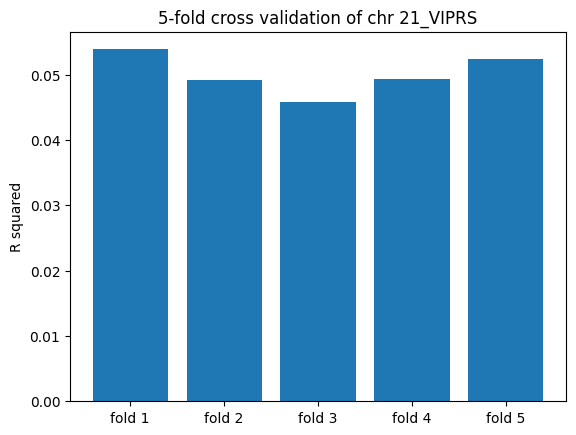

In [ ]:
#VIPRS chr 21
x_axis = ['fold 1','fold 2','fold 3','fold 4','fold 5']
plt.bar(x_axis, prs_list_21)
plt.title('5-fold cross validation of chr 21_VIPRS')
plt.ylabel('R squared')
plt.show()

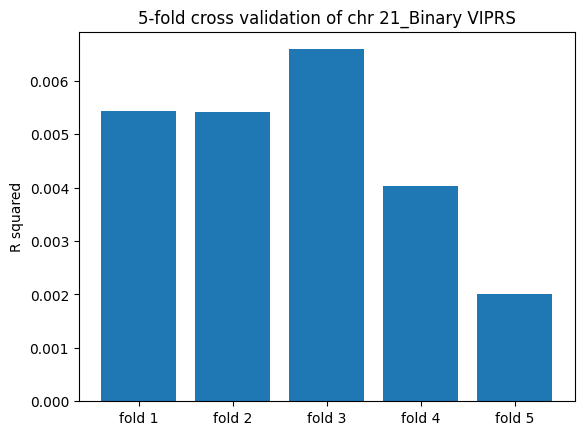

In [ ]:
#Binary chr 21
r_21 =[0.005427640096552501,0.005409922917999076,0.006591295009155657,0.004035857542031033,0.002009611899971811]
x_axis = ['fold 1','fold 2','fold 3','fold 4','fold 5']
plt.bar( x_axis,r_21)
plt.title('5-fold cross validation of chr 21_Binary VIPRS')
plt.ylabel('R squared')
plt.show()

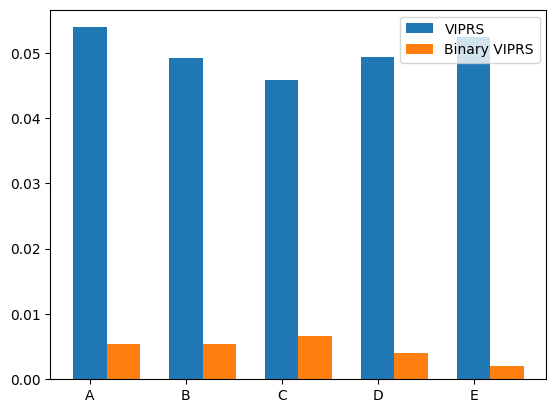

In [ ]:
#compare
x_labels = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

# set the width of the bars
bar_width = 0.35
# create the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(prs_list_21)), prs_list_21, bar_width, label='VIPRS')
bar2 = ax.bar(np.arange(len(r_21))+bar_width, r_21, bar_width, label='Binary VIPRS')
# add x-axis labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)

# add legend
ax.legend()

# show the plot
plt.show()


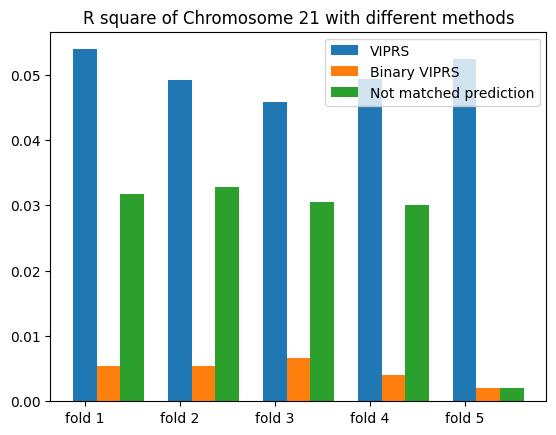

In [ ]:
x_labels = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

# set the width of the bars
bar_width = 0.25

r_21_5_others=[0.03173167057012635,0.03286556597529352,0.03045829503211559,0.03002631010236178,0.002009611899971811]
# create the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(prs_list_21)), prs_list_21, bar_width, label='VIPRS')
bar2 = ax.bar(np.arange(len(r_21))+bar_width, r_21, bar_width, label='Binary VIPRS')
bar3 = ax.bar(np.arange(len(r_21_5_others))+bar_width*2, r_21_5_others, bar_width, label='Not matched prediction')

ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_title("R square of Chromosome 21 with different methods")

ax.legend()

# show the plot
plt.show()


## CHR_22

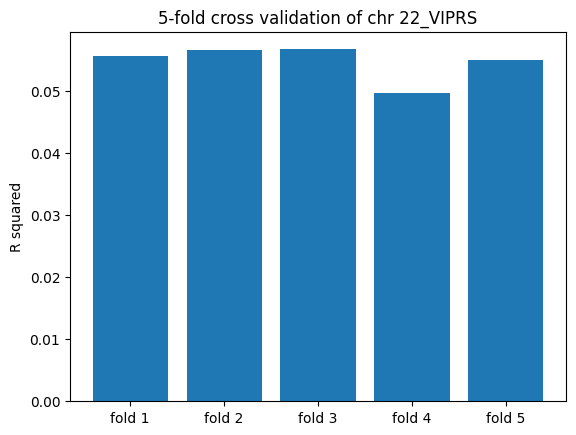

In [ ]:
#VIPRS chr 22
prs_list_22= [0.055597501566565094,0.05662839494151994,0.05675185787991545,0.04973819994354065,0.05500067191579865]

x_axis = ['fold 1','fold 2','fold 3','fold 4','fold 5']
plt.bar(x_axis, prs_list_22)
plt.title('5-fold cross validation of chr 22_VIPRS')
plt.ylabel('R squared')
plt.show()

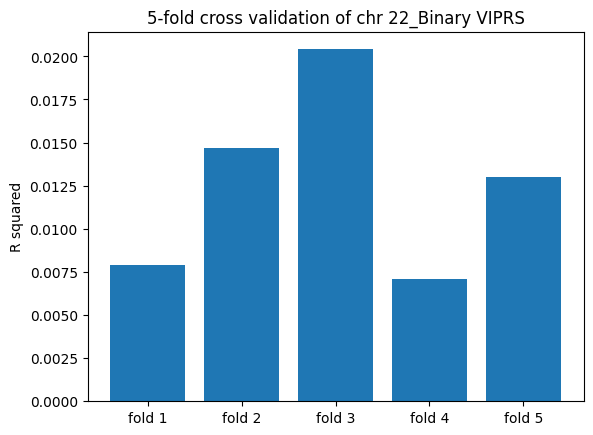

In [ ]:
#Binary chr 22
r_22 =[0.007895694482472484,0.014708237139216991,0.020410001625804856,0.007091791567628878,0.012976876890607232]
x_axis = ['fold 1','fold 2','fold 3','fold 4','fold 5']
plt.bar( x_axis,r_22)
plt.title('5-fold cross validation of chr 22_Binary VIPRS')
plt.ylabel('R squared')
plt.show()

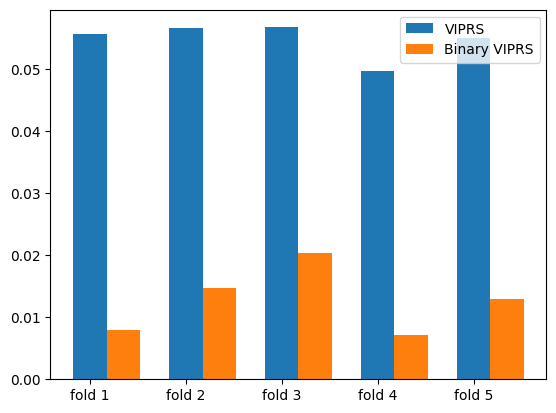

In [ ]:
#compare
x_labels = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

# set the width of the bars
bar_width = 0.35
# create the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(prs_list_22)), prs_list_22, bar_width, label='VIPRS')
bar2 = ax.bar(np.arange(len(r_22))+bar_width, r_22, bar_width, label='Binary VIPRS')
# add x-axis labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)

# add legend
ax.legend()

# show the plot
plt.show()

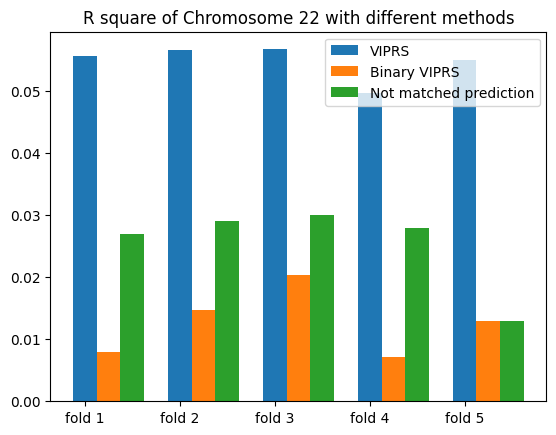

In [ ]:
x_labels = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

# set the width of the bars
bar_width = 0.25
r_22_5_others=[0.02695693503256915,0.029093638198121538,0.029985247846254733,0.02793719269149507,0.012976876890607232]
# create the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(prs_list_22)), prs_list_22, bar_width, label='VIPRS')
bar2 = ax.bar(np.arange(len(r_22))+bar_width, r_22, bar_width, label='Binary VIPRS')
bar3 = ax.bar(np.arange(len(r_22_5_others))+bar_width*2, r_22_5_others, bar_width, label='Not matched prediction')

ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)

ax.legend()
ax.set_title("R square of Chromosome 22 with different methods")

# show the plot
plt.show()